In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [110]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
EPOCHS = 20
TEST_SIZE = 0.2
BATCH_SIZE = 32

In [111]:
df=pd.read_csv("FastagFraudDetection.csv")
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


### Getting the information about the dataset

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [113]:
df.shape

(5000, 13)

In [114]:
df.head(20)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud
6,7,1/12/2023 15:40,SUV,FTG-707-JKL-210,B-102,Express,Large,180,160,"13.059816123454882, 77.77068662374292",70,KA22MN4567,Fraud
7,8,1/13/2023 20:15,Bus,FTG-088-UVW-543,C-103,Regular,Large,350,90,"13.059816123454882, 77.77068662374292",88,KA21OP8901,Fraud
8,9,1/14/2023 1:55,Car,FTG-909-RST-876,A-101,Express,Small,120,0,"13.059816123454882, 77.77068662374292",45,KA16QR2345,Fraud
9,10,1/15/2023 7:30,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",72,KA22ST6789,Not Fraud


In [115]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [116]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [117]:
df=df.dropna(subset=['FastagID'])# to drop column so as to drop fasttag as there are missing values

In [118]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [119]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\kunal\AppData\Local\Temp\ipykernel_14492\766710655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


### Splitting and training the dataset


In [126]:
from sklearn.model_selection import train_test_split
selected_features=['Transaction_Amount','Amount_paid']
X = df[selected_features]
y = df['Fraud_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [127]:
#Scaling and encoding output
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Applying Neural Network Algorithm

In [128]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [129]:
# Neural network network
model=Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [130]:
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                96        
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [131]:
history = model.fit(X_train,y_train, epochs=EPOCHS , batch_size=BATCH_SIZE, validation_split=TEST_SIZE)

Epoch 1/20
89/89 [==============================] - 3s 16ms/step - loss: 0.4471 - accuracy: 0.8388 - val_loss: 0.3814 - val_accuracy: 0.8272
Epoch 2/20
89/89 [==============================] - 1s 8ms/step - loss: 0.2960 - accuracy: 0.8754 - val_loss: 0.2638 - val_accuracy: 0.8848
Epoch 3/20
89/89 [==============================] - 1s 7ms/step - loss: 0.2118 - accuracy: 0.9185 - val_loss: 0.1844 - val_accuracy: 0.9185
Epoch 4/20
89/89 [==============================] - 1s 8ms/step - loss: 0.1600 - accuracy: 0.9477 - val_loss: 0.1377 - val_accuracy: 0.9522
Epoch 5/20
89/89 [==============================] - 1s 8ms/step - loss: 0.1314 - accuracy: 0.9607 - val_loss: 0.1112 - val_accuracy: 0.9522
Epoch 6/20
89/89 [==============================] - 1s 8ms/step - loss: 0.1117 - accuracy: 0.9652 - val_loss: 0.0959 - val_accuracy: 0.9677
Epoch 7/20
89/89 [==============================] - 1s 8ms/step - loss: 0.1002 - accuracy: 0.9782 - val_loss: 0.0825 - val_accuracy: 0.9789
Epoch 8/20
89/89 [=

In [132]:
y_pred = model.predict(X_test)
y_pred.shape

28/28 [==============================] - 0s 4ms/step


(891, 1)

In [133]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.447149,0.838834,0.381419,0.827247
1,0.295965,0.875351,0.263767,0.884831
2,0.211805,0.918539,0.184427,0.918539
3,0.159959,0.947683,0.137660,0.952247
4,0.131366,0.960674,0.111181,0.952247


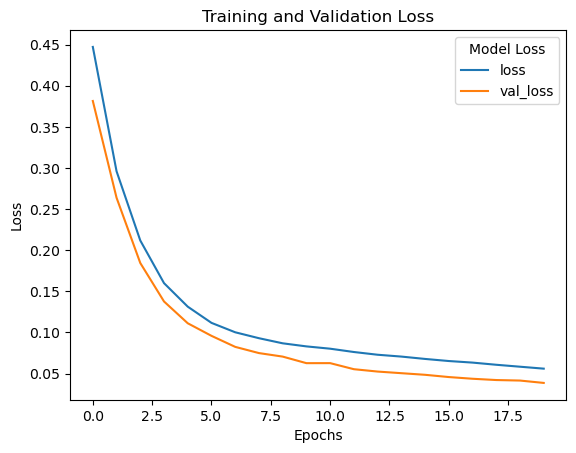

In [134]:
loss_df.plot(y=['loss', 'val_loss'])
plt.legend(title='Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

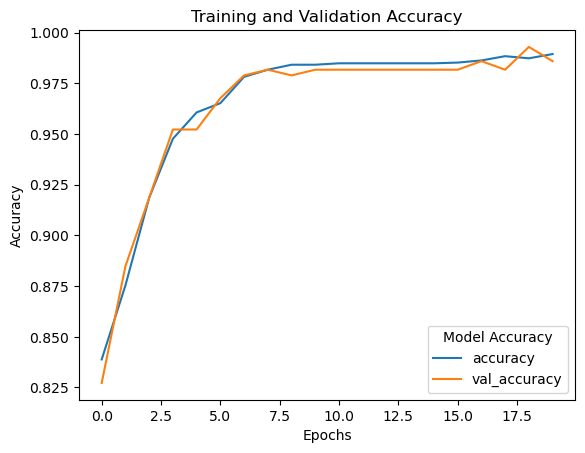

In [135]:
loss_df.plot(y=['accuracy', 'val_accuracy'])
plt.legend(title='Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

#### Importing libraries and checking accuracy

In [136]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [137]:
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)

28/28 [==============================] - 0s 5ms/step


In [138]:
accuracy_score(y_test, y_pred)

0.9842873176206509

In [139]:
print(classification_report(y_test,y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.23      1.00      0.37       201
           1       0.00      0.00      0.00       690

    accuracy                           0.23       891
   macro avg       0.11      0.50      0.18       891
weighted avg       0.05      0.23      0.08       891



c:\Users\kunal\anaconda3\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kunal\anaconda3\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kunal\anaconda3\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [140]:
confusion_matrix(y_test,y_pred.argmax(axis=1))

array([[201,   0],
       [690,   0]], dtype=int64)

In [141]:
# Generate predictions
predictions = (model.predict(X_test) > 0.5).astype("int32")

# Save predictions to CSV
output = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
output.to_csv('prediction.csv', index=False)

28/28 [==============================] - 0s 5ms/step
